# LC-MS MetaboloTools

In [1]:
# Data Science Tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
# Bioinfokit
import bioinfokit as bik
from bioinfokit import analys, visuz

### Read LC-MS output metabolite name-containing files and preprocess

In [2]:
# Control
sample_T_C_1 = pd.read_excel('sample_T_C_1.xlsx', header=None).iloc[:, 0].tolist()
sample_T_C_2 = pd.read_excel('sample_T_C_2.xlsx', header=None).iloc[:, 0].tolist()
sample_T_C_3  = pd.read_excel('sample_T_C_3.xlsx', header=None).iloc[:, 0].tolist()

# In Vitro
sample_T_invitro_1 = pd.read_excel('sample_T_in_vitro_1.xlsx', header=None).iloc[:, 0].tolist()
sample_T_invitro_2 = pd.read_excel('sample_T_in_vitro_2.xlsx', header=None).iloc[:, 0].tolist()
sample_T_invitro_3 = pd.read_excel('sample_T_in_vitro_3.xlsx', header=None).iloc[:, 0].tolist()

# In Vivo
sample_T_invivo_1 = pd.read_excel('sample_T_in_vivo_1.xlsx', header=None).iloc[:, 0].tolist()
sample_T_invivo_2 = pd.read_excel('sample_T_in_vivo_2.xlsx', header=None).iloc[:, 0].tolist()
sample_T_invivo_3 = pd.read_excel('sample_T_in_vivo_3.xlsx', header=None).iloc[:, 0].tolist()

In [3]:
# Create a dictionary of Sample names and metabolite name-containing lists

data = {
    "Control T-cells 1": sample_T_C_1,
    "Control T-cells 2": sample_T_C_2,
    "Control T-cells 3": sample_T_C_3,

    "In Vitro T-cells 1": sample_T_invitro_1,
    "In Vitro T-cells 2": sample_T_invitro_2,
    "In Vitro T-cells 3": sample_T_invitro_3,

    "In Vivo T-cells 1": sample_T_invivo_1,
    "In Vivo T-cells 2": sample_T_invivo_2,
    "In Vivo T-cells 3": sample_T_invivo_3,
}

In [4]:
# Build a data frame of samples and their metabolites

metabolites = set(metabolite for sample in data.values() for metabolite in sample)

df = pd.DataFrame(
    {metabolite: [1 if metabolite in data[name] else 0 for name in data.keys()] for metabolite in metabolites},
    index=data.keys()
)

df

,Galactose,Urine,Cholesterol,Mannose,Citric acid,Tyrosine,Aspartate,Glucose,Caffeine,Morphine,Lactose,Arginine
Control T-cells 1,0,0,0,0,1,1,0,1,0,0,1,1
Control T-cells 2,0,0,0,0,1,1,0,1,1,0,1,1
Control T-cells 3,0,0,0,0,1,1,0,1,0,1,1,1
In Vitro T-cells 1,0,1,1,1,1,1,1,1,0,0,1,0
In Vitro T-cells 2,0,1,1,1,1,1,1,1,1,0,1,0
In Vitro T-cells 3,0,1,1,1,1,1,1,1,0,1,1,0
In Vivo T-cells 1,1,0,0,1,0,0,0,1,0,0,1,1
In Vivo T-cells 2,1,0,0,1,0,0,0,1,1,0,1,1
In Vivo T-cells 3,1,0,0,1,1,0,0,1,0,1,1,1


In [5]:
# Cluster samples and Metabolites

cluster_map = sns.clustermap(df)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df = df.iloc[:, clustered_cols] # Metabolite clustering 
# clustered_df = df.iloc[clustered_rows, :].iloc[:, clustered_cols] # Metabolite and sample clustering
clustered_df

,Arginine,Glucose,Lactose,Citric acid,Tyrosine,Morphine,Galactose,Mannose,Caffeine,Aspartate,Urine,Cholesterol
Control T-cells 1,1,1,1,1,1,0,0,0,0,0,0,0
Control T-cells 2,1,1,1,1,1,0,0,0,1,0,0,0
Control T-cells 3,1,1,1,1,1,1,0,0,0,0,0,0
In Vitro T-cells 1,0,1,1,1,1,0,0,1,0,1,1,1
In Vitro T-cells 2,0,1,1,1,1,0,0,1,1,1,1,1
In Vitro T-cells 3,0,1,1,1,1,1,0,1,0,1,1,1
In Vivo T-cells 1,1,1,1,0,0,0,1,1,0,0,0,0
In Vivo T-cells 2,1,1,1,0,0,0,1,1,1,0,0,0
In Vivo T-cells 3,1,1,1,1,0,1,1,1,0,0,0,0


# Metabolite Production Analysis

In [6]:
# Design matrix
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': [ 
              'Control T-cells','Control T-cells','Control T-cells',
              'In Vitro T-cells','In Vitro T-cells','In Vitro T-cells',
              'In Vivo T-cells','In Vivo T-cells','In Vivo T-cells',
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

{'Control T-cells 1': 'Control T-cells',
 'Control T-cells 2': 'Control T-cells',
 'Control T-cells 3': 'Control T-cells',
 'In Vitro T-cells 1': 'In Vitro T-cells',
 'In Vitro T-cells 2': 'In Vitro T-cells',
 'In Vitro T-cells 3': 'In Vitro T-cells',
 'In Vivo T-cells 1': 'In Vivo T-cells',
 'In Vivo T-cells 2': 'In Vivo T-cells',
 'In Vivo T-cells 3': 'In Vivo T-cells'}

### PCA

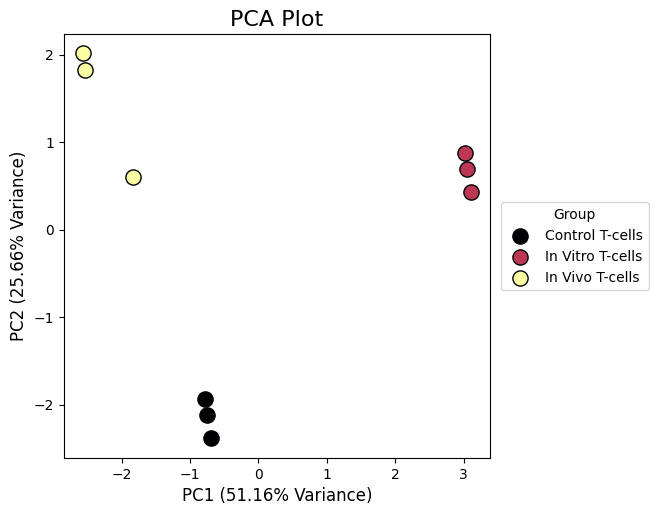

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustered_df)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pca_results

# Create a df for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Sample'] = list(clustered_df.T.columns)

# Plot the first 2 PC
plt.figure(figsize=(5.5, 5.5))

pca_df['Group'] = pca_df['Sample'].map(column_to_group)
unique_groups = pca_df['Group'].unique()
colors = plt.cm.inferno(np.linspace(0, 1, len(unique_groups))) # Choose cmap here, i.e. cm.viridis ot cm.tab10 
                                                               # https://matplotlib.org/stable/users/explain/colors/colormaps.html

for group, color in zip(unique_groups, colors):
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        label=f"{group}",
        color=color, edgecolor='k', s=120
    )

plt.title('PCA Plot', fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.legend(
    title="Group", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.
) 
# plt.grid(True)
plt.savefig('PCA plot.png', dpi=600, bbox_inches='tight')
plt.show()

### Heatmap

In [19]:
visuz.gene_exp.hmap(df=df, cmap='bwr', 
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Metabolite clustering
                    # colclus=True, rowclus=True, # Metabolite and sample clustering
                    dim=(3.8,2.75),  
                    tickfont=(5, 5), r=600, figname='clustered_df', show=False)
plt.close()

### Select Differentially Produced Metabolites

In [33]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df["Group"] = df.index.map(column_to_group)
significant_variables = []

significance_th = 0.05 # Pick significance threshold (0.05 / 0.01 / 0.05)

# Perform Two-Way ANOVA with Tukey for each Metabolite
for variable in df.columns[:-1]:  # Exclude the "Group" column
    data_long = df.reset_index().melt(id_vars=["index", "Group"], value_vars=[variable])
    data_long.rename(columns={"index": "Sample", "value": "Value", "variable": "Variable"}, inplace=True)
    
    # Perform Two-Way ANOVA
    model = ols("Value ~ C(Group)", data=data_long).fit()
    anova_results = anova_lm(model)
    
    # Significance test
    if anova_results.loc["C(Group)", "PR(>F)"] < significance_th:
        # Perform Tukey
        tukey = pairwise_tukeyhsd(endog=data_long["Value"], groups=data_long["Group"], alpha=0.05)
        significant_comparisons = tukey.summary().data[1:]  # Skip the header
        
        # Check if any pairwise comparison is significant
        is_significant = any(row[4] < significance_th for row in significant_comparisons)
        
        if is_significant:
            significant_variables.append(variable)

# Create a new DataFrame with only significant metabolites
df_significant = df[significant_variables]
df_significant

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: invalid value encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st

,Galactose,Urine,Cholesterol,Mannose,Tyrosine,Aspartate,Arginine
Control T-cells 1,0,0,0,0,1,0,1
Control T-cells 2,0,0,0,0,1,0,1
Control T-cells 3,0,0,0,0,1,0,1
In Vitro T-cells 1,0,1,1,1,1,1,0
In Vitro T-cells 2,0,1,1,1,1,1,0
In Vitro T-cells 3,0,1,1,1,1,1,0
In Vivo T-cells 1,1,0,0,1,0,0,1
In Vivo T-cells 2,1,0,0,1,0,0,1
In Vivo T-cells 3,1,0,0,1,0,0,1


In [34]:
# Cluster differentially-produced metabolites

cluster_map = sns.clustermap(df_significant)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df_significant = df_significant.iloc[:, clustered_cols] # Metabolite clustering 
# clustered_df_significant = df_significant.iloc[clustered_rows, :].iloc[:, clustered_cols] # Metabolite and sample clustering
clustered_df_significant

,Tyrosine,Aspartate,Urine,Cholesterol,Arginine,Galactose,Mannose
Control T-cells 1,1,0,0,0,1,0,0
Control T-cells 2,1,0,0,0,1,0,0
Control T-cells 3,1,0,0,0,1,0,0
In Vitro T-cells 1,1,1,1,1,0,0,1
In Vitro T-cells 2,1,1,1,1,0,0,1
In Vitro T-cells 3,1,1,1,1,0,0,1
In Vivo T-cells 1,0,0,0,0,1,1,1
In Vivo T-cells 2,0,0,0,0,1,1,1
In Vivo T-cells 3,0,0,0,0,1,1,1


In [35]:
visuz.gene_exp.hmap(df=df_significant, cmap='bwr', 
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Metabolite clustering
                    # colclus=True, rowclus=True, # Metabolite and sample clustering
                    dim=(3.8,2.75),  
                    tickfont=(5, 5), r=600, figname='clustered_df_significant', show=False)
plt.close()

In [ ]:
clustered_df_significant.T.to_csv('clustered_df_significant.csv') # For CytoScape